<a href="https://colab.research.google.com/github/jonisabdulkarim/CE888/blob/main/Lab7/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First CNN model for MNIST Dataset

* MNIST Dataset is ''Hello World'' of Image Recognition

* [Dataset HomePage](http://yann.lecun.com/exdb/mnist/)

* History of MNIST Dataset [Watch here](https://www.youtube.com/watch?v=oKzNUGz21JM)


---
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a 
test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

![Kitten](https://camo.githubusercontent.com/01c057a753e92a9bc70b8c45d62b295431851c09cffadf53106fc0aea7e2843f/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067)


# Let's start building our first CNN Model

In [1]:
import numpy as np
np.random.seed(0)

#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras import models
#from tensorflow.keras import layers
#from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import keras
from keras import models, layers

import ray
from ray import tune
import inspect
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

#!pip install ray
#!pip install tensorboardX

Importantly, a convnet takes as input tensors of shape (image_height, image_width,
image_channels) (not including the batch dimension). In this case, we’ll configure
the convnet to process inputs of size (28, 28, 1), which is the format of MNIST
images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first
layer.

#### Instantiating a small convnet

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Adding a classifier on top of the convnet

In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

### Training the convnet on MNIST images

In [4]:
from keras.datasets import mnist
from keras.utils import to_categorical

#### Load Data

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#### compile and fit model 

In [6]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 41s 54ms/step - loss: 0.4475 - accuracy: 0.8570 - val_loss: 0.0580 - val_accuracy: 0.9825
Epoch 2/5
750/750 [==============================] - 40s 54ms/step - loss: 0.0595 - accuracy: 0.9819 - val_loss: 0.0464 - val_accuracy: 0.9859
Epoch 3/5
750/750 [==============================] - 40s 53ms/step - loss: 0.0356 - accuracy: 0.9886 - val_loss: 0.0471 - val_accuracy: 0.9862
Epoch 4/5
750/750 [==============================] - 40s 54ms/step - loss: 0.0275 - accuracy: 0.9916 - val_loss: 0.0405 - val_accuracy: 0.9888
Epoch 5/5
750/750 [==============================] - 39s 52ms/step - loss: 0.0181 - accuracy: 0.9942 - val_loss: 0.0386 - val_accuracy: 0.9894


#### evaluate model

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 3s 9ms/step - loss: 0.0269 - accuracy: 0.9919


0.9919000267982483

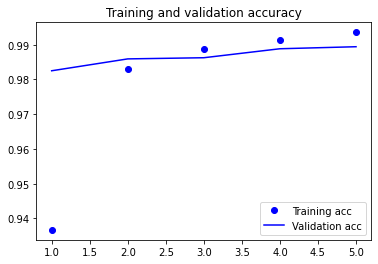

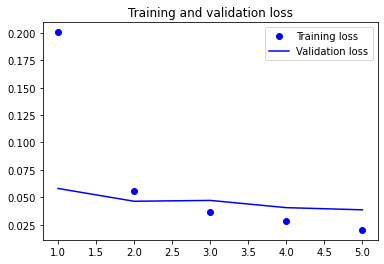

In [10]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Task 1

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance. If possible create a grid search. 

In [4]:
def create_model(loss, metrics):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  
  model.compile(optimizer='rmsprop',
              loss=loss,
              metrics=metrics)
  return model

In [5]:
def tune_model(config):
  #model = create_model('rmsprop', 'categorical_crossentropy', ['accuracy'])
  model = create_model(config["loss"], config["met"])
  checkpoint_callback = ModelCheckpoint(
      "model.h5", monitor="loss", save_best_only=True, save_freq=2)
  
  callbacks = [checkpoint_callback, TuneReporterCallback()]

  # train the model
  history = model.fit(
      train_images, train_labels, 
      epochs=5, 
      batch_size=64, 
      validation_split=0.2)
  
  return model, history

In [6]:
def test():
  test_loss, test_acc = model.evaluate(test_images, test_labels)
  print("test_acc",test_acc)
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

  return test_loss, test_acc


In [ ]:
base_model = train()

In [ ]:
base_loss, base_acc = test()

In [7]:
class TuneReporterCallback(keras.callbacks.Callback):
  def __init__(self, logs={}):
    self.iteration = 0
    super(TuneReporterCallback, self).__init__()
  
  def on_epoch_end(self, batch, logs={}):
    self.iteration += 1
    tune.report(keras_info=logs, mean_accuracy=logs.get("accuracy"),
                mean_loss=logs.get("loss"))

In [8]:
np.random.seed(5)

parameters = {
    #"opt": ['rmsprop'],
    "loss": ['categorical_crossentropy', 'sparse_categorical_crossentropy'],
    "met": ['accuracy']
}

ray.shutdown()
ray.init(log_to_driver=False)

!rm -rf ~/ray_results/tune_model

analysis = tune.run(
    tune_model,
    verbose=1,
    config=parameters,
    num_samples=4)

Trial name,# failures,error file
tune_model_8b01d_00000,1,/root/ray_results/tune_model_2021-03-05_14-03-19/tune_model_8b01d_00000_0_2021-03-05_14-03-23/error.txt
tune_model_8b01d_00001,1,/root/ray_results/tune_model_2021-03-05_14-03-19/tune_model_8b01d_00001_1_2021-03-05_14-03-29/error.txt


2021-03-05 14:10:43,301	WARNING util.py:152 -- The `start_trial` operation took 2.926 s, which may be a performance bottleneck.


KeyboardInterrupt: ignored

In [9]:
!cat /root/ray_results/tune_model_2021-03-05_14-03-19/tune_model_8b01d_00000_0_2021-03-05_14-03-23/error.txt

Failure # 1 (occurred at 2021-03-05_14-10-32)
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/ray/tune/trial_runner.py", line 586, in _process_trial
    results = self.trial_executor.fetch_result(trial)
  File "/usr/local/lib/python3.7/dist-packages/ray/tune/ray_trial_executor.py", line 609, in fetch_result
    result = ray.get(trial_future[0], timeout=DEFAULT_GET_TIMEOUT)
  File "/usr/local/lib/python3.7/dist-packages/ray/_private/client_mode_hook.py", line 47, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/ray/worker.py", line 1456, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(TuneError): ray::ImplicitFunc.train_buffered() (pid=4579, ip=172.28.0.2)
  File "python/ray/_raylet.pyx", line 480, in ray._raylet.execute_task
  File "python/ray/_raylet.pyx", line 432, in ray._raylet.execute_task.function_executor
  File "/usr/local/lib/python3.7/dist-packages/ray/tune/trainable.py", line

In [11]:
%load_ext tensorboard

In [12]:
%tensorboard --logdir ~/ray_results/tune_model

<IPython.core.display.Javascript object>